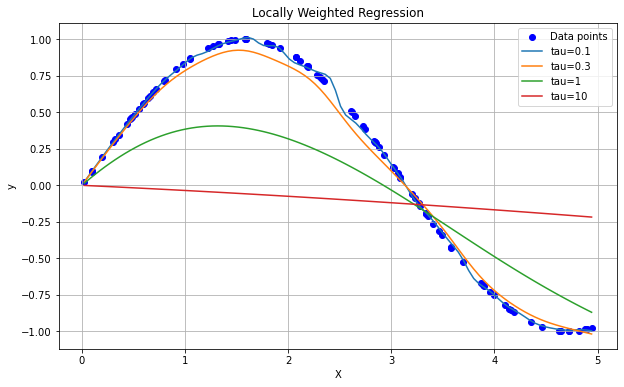

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(test_point, X, y, tau):
    """
    Locally Weighted Regression (LWR) function
    """
    m = X.shape[0]  
    weights = np.exp(-np.sum((X - test_point)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    prediction = test_point @ theta
    return prediction

def plot_lwr(X, y, tau_values):
    """
    Plotting the Locally Weighted Regression predictions for different tau values
    """
    X_test = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
    plt.figure(figsize=(10, 6)) 
    plt.scatter(X, y, color='blue', label='Data points')
    for tau in tau_values:
        predictions = [locally_weighted_regression(np.array([x]), X, y, tau) for x in X_test]
        plt.plot(X_test, predictions, label=f'tau={tau}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Locally Weighted Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate sample dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Define tau values
tau_values = [0.1, 0.3, 1, 10]

# Plot Locally Weighted Regression for different tau values
plot_lwr(X, y, tau_values)
